In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib as mpl
from PIL import Image
mpl.rcParams['figure.dpi'] = 200

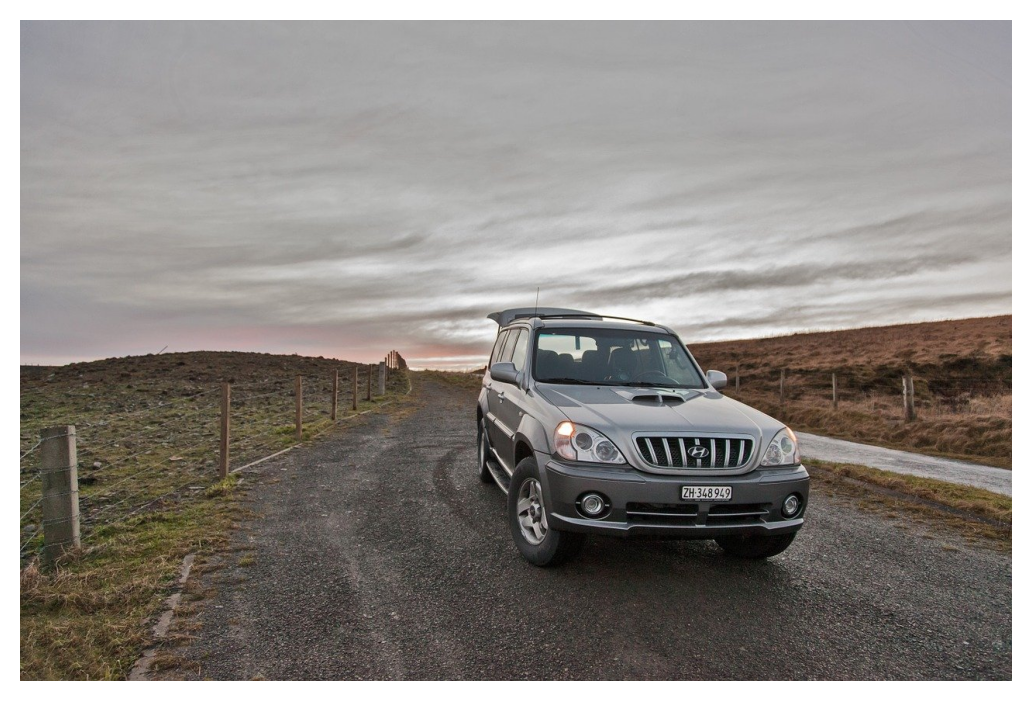

In [2]:
img = cv2.imread('photo/1.jpeg')
plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [3]:
img.shape

(853, 1280, 3)

True

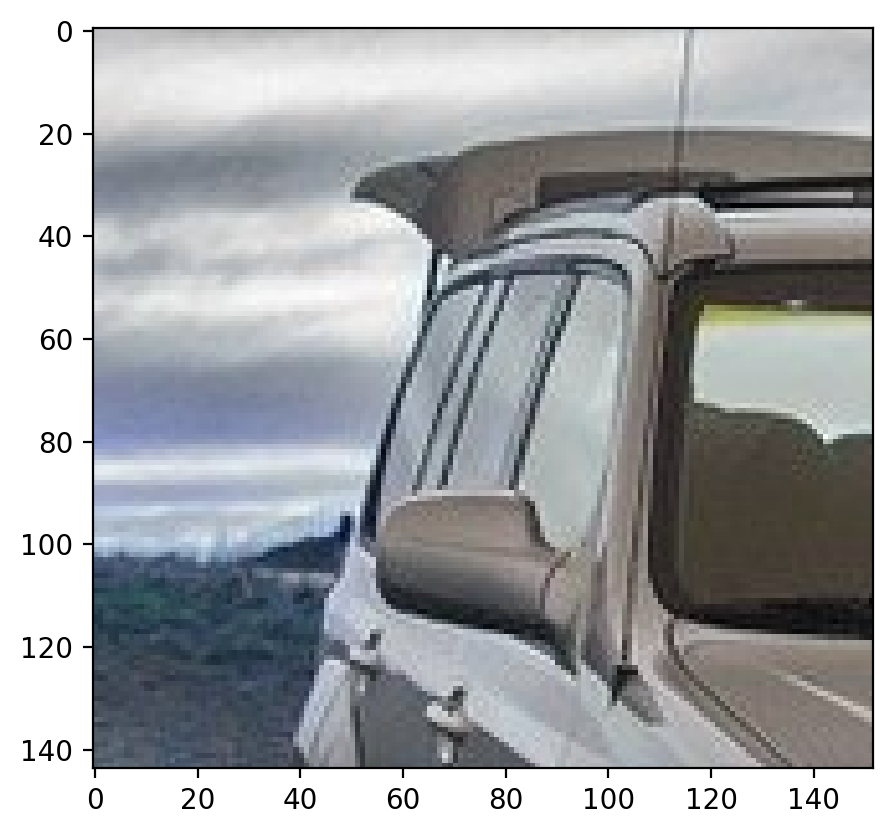

In [4]:
cropped_image = img[352:496, 552:704]
plt.imshow(cropped_image)
# Save the cropped image
cv2.imwrite("photo/CI.jpg", cropped_image)

In [5]:
cropped_image.shape

(144, 152, 3)

In [14]:
#!pip3 install opencv-python==4.4.0.42 opencv-contrib-python==4.4.0.42

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 MB 4.3 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.7.0.72
    Uninstalling opencv-contrib-python-4.7.0.72:
      Successfully uninstalled opencv-contrib-python-4.7.0.72


In [6]:
#Используйте дескриптор SIFT для нахождения одного изображения в другом (кадрированного на исх/span>
sift = cv2.xfeatures2d.SIFT_create()
kp, des = sift.detectAndCompute(cropped_image, None)
for i in range(0,3):
  print("SIFT Keypoint:",i)
  print("Координаты ",kp[i].pt,"Размер ", kp[i].size, "Угол ", kp[i].angle)

SIFT Keypoint: 0
Координаты  (10.647746086120605, 100.4332046508789) Размер  3.4419548511505127 Угол  269.4967041015625
SIFT Keypoint: 1
Координаты  (11.101645469665527, 45.469905853271484) Размер  4.700146675109863 Угол  69.83587646484375
SIFT Keypoint: 2
Координаты  (12.704222679138184, 39.092350006103516) Размер  3.995588779449463 Угол  71.20217895507812


[ WARN:0] global /private/var/folders/nz/vv4_9tw56nv9k3tkvyszvwg80000gn/T/pip-req-build-48c801ya/opencv_contrib/modules/xfeatures2d/misc/python/shadow_sift.hpp (15) SIFT_create DEPRECATED: cv.xfeatures2d.SIFT_create() is deprecated due SIFT tranfer to the main repository. https://github.com/opencv/opencv/issues/16736


In [7]:
sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(img, None) 
kp2, des2 = sift.detectAndCompute(cropped_image, None) 

In [8]:

bf = cv2.BFMatcher(cv2.NORM_L1,crossCheck=True) 
#crossCheck=false - совпадения вида один ко многим, crossCheck=true - совпадения вида один к одному
matches = bf.match(des1,des2)

In [9]:
matches = sorted(matches, key = lambda x:x.distance) 
print('Количество совпадений ', len(matches))
for i in range(0,3): #выведем первые 3 
  print('Расстояние ',matches[i].distance,'Индекс 1 ',matches[i].trainIdx,'Индекс 2 ', matches[i].queryIdx)

Количество совпадений  96
Расстояние  0.0 Индекс 1  6 Индекс 2  1713
Расстояние  0.0 Индекс 1  8 Индекс 2  1719
Расстояние  0.0 Индекс 1  11 Индекс 2  1728


In [16]:
print(kp1[matches[0].queryIdx].pt)
print(img[456, 571])
#plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))

(570.6309814453125, 456.0890808105469)
[ 66  86 111]
